Импорт библиотек

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

Загрузка преобработанного датасета и просмотр основной его информации

In [17]:
df = pd.read_csv('pretty_car_price_dataset.csv', encoding='utf8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Бренд                  10002 non-null  object 
 1   Модель                 10002 non-null  object 
 2   Год                    10002 non-null  int64  
 3   Объём двигателя        10002 non-null  float64
 4   Тип топлива            10002 non-null  object 
 5   Трансмиссия            10002 non-null  object 
 6   Пробег                 10002 non-null  int64  
 7   Количество дверей      10002 non-null  int64  
 8   Количество владельцев  10002 non-null  int64  
 9   Стоимость              10002 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.5+ KB


In [18]:
categorical_columns = ['Бренд', 'Модель', 'Тип топлива', 'Трансмиссия']

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

       Бренд  Модель   Год  Объём двигателя  Тип топлива  Трансмиссия  Пробег  \
0          6      24  2020              4.2            0            1  289944   
1          2      19  2012              2.0            2            0    5356   
2          7      16  2020              4.2            0            0  231440   
3          0      22  2023              2.0            1            1  160971   
4          9      17  2003              2.6            2            2  286618   
...      ...     ...   ...              ...          ...          ...     ...   
9997       6      20  2004              3.7            0            2    5794   
9998       2      18  2002              1.4            1            0  168000   
9999       1       0  2010              3.0            3            0   86664   
10000      3      13  2002              1.4            2            0  225772   
10001      9      27  2001              2.1            0            1  157882   

       Количество дверей  К

Разделение данных на класс и признаки.


Класс - Стоимость

Признаки - все остальные столбцы

Стандартизируем данные (кроме целевой переменной)

In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Стоимость']))
df_scaled = pd.DataFrame(scaled_data, columns=df.drop(columns=['Стоимость']).columns)
print(df_scaled)

          Бренд    Модель       Год  Объём двигателя  Тип топлива  \
0      0.666667  0.827586  0.869565            0.800     0.000000   
1      0.222222  0.655172  0.521739            0.250     0.666667   
2      0.777778  0.551724  0.869565            0.800     0.000000   
3      0.000000  0.758621  1.000000            0.250     0.333333   
4      1.000000  0.586207  0.130435            0.400     0.666667   
...         ...       ...       ...              ...          ...   
9997   0.666667  0.689655  0.173913            0.675     0.000000   
9998   0.222222  0.620690  0.086957            0.100     0.333333   
9999   0.111111  0.000000  0.434783            0.500     1.000000   
10000  0.333333  0.448276  0.086957            0.100     0.666667   
10001  1.000000  0.931034  0.043478            0.275     0.000000   

       Трансмиссия    Пробег  Количество дверей  Количество владельцев  
0              0.5  0.966648           0.333333                   1.00  
1              0.0  0.017

In [20]:
X = df_scaled
y = df['Стоимость']

Понижение размерности методом главных компонент (PCA)

In [21]:
pca = PCA(n_components=4)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca)


              0         1         2         3
0     -0.005537 -0.474243 -0.267443  0.581576
1     -0.519785 -0.213609  0.486516 -0.063140
2     -0.499654 -0.208826 -0.507526 -0.022174
3     -0.018145 -0.431732  0.216738 -0.517342
4      0.525868  0.002722  0.213813  0.320854
...         ...       ...       ...       ...
9997   0.477279 -0.713896  0.015959  0.362385
9998  -0.496359 -0.433140  0.245574 -0.447407
9999  -0.491510  0.719629  0.047192 -0.772890
10000 -0.476199  0.267676  0.011894 -0.465566
10001  0.006759 -0.446126 -0.263592  0.454868

[10002 rows x 4 columns]


Выводим значения дисперсии и собственные числа, которые соответствуют компонентам

In [25]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.16371808 0.13691921 0.13388719 0.12818711]
[40.7237755  37.2419068  36.82724418 36.03478106]


In [28]:
X_pca['Стоимость'] = y
X_pca.columns = ['PC1', "PC2", 'PC3', "PC4", 'Стоимость']
print(X_pca.head())

        PC1       PC2       PC3       PC4  Стоимость
0 -0.005537 -0.474243 -0.267443  0.581576       8501
1 -0.519785 -0.213609  0.486516 -0.063140      12092
2 -0.499654 -0.208826 -0.507526 -0.022174      11171
3 -0.018145 -0.431732  0.216738 -0.517342      11780
4  0.525868  0.002722  0.213813  0.320854       2867


Визуализация

IndexError: list index out of range

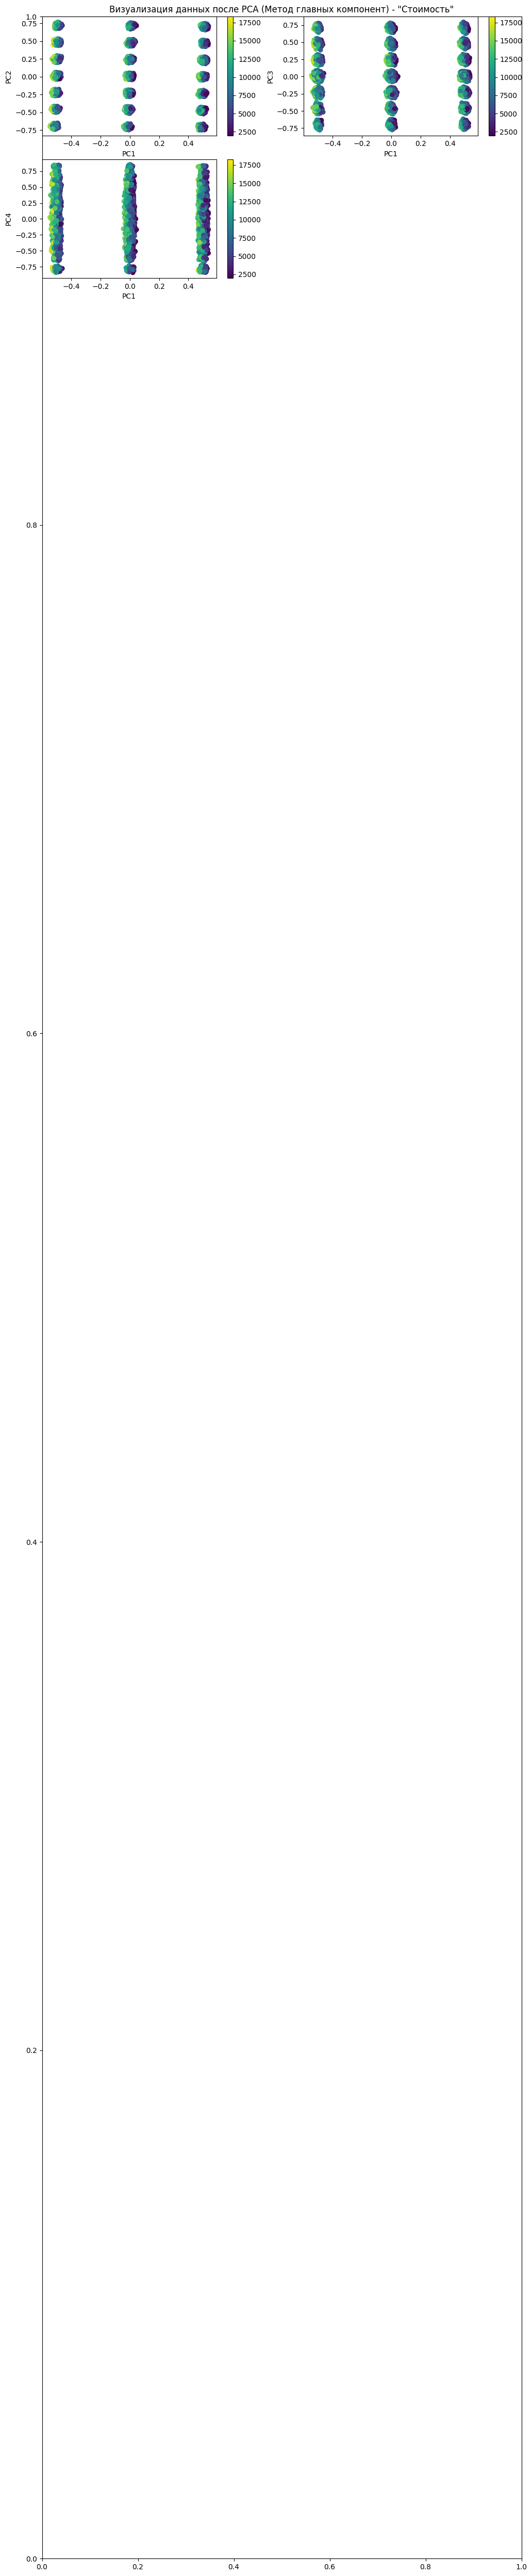

In [29]:
cols = ["PC1", "PC2", "PC3", "PC4"]

plt.figure(figsize=(12, 64))
plt.title('Визуализация данных после PCA (Метод главных компонент) - "Стоимость"')
k = 1
for i in range(9):
    for j in range(i+1, 9):
        col1 = cols[i]
        col2 = cols[j]
        plt.subplot(18, 2, k)
        plt.scatter(X_pca[col1], X_pca[col2], c=y, cmap='viridis')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.colorbar()
        k += 1
plt.tight_layout()
plt.show()

Понижение размерности методом факторного анализа (Factor Analysis)

In [30]:
fa = FactorAnalysis(n_components=4)
X_fa = pd.DataFrame(fa.fit_transform(X))
print(X_fa)

              0         1         2         3
0      0.713624 -0.173135  0.220934  0.483707
1     -0.123971  0.682379 -0.054261 -0.142859
2      0.426805  0.025013 -0.142098  0.374048
3     -0.320185  0.180718  0.066166  0.017866
4      0.780097 -0.439884  0.434928  0.004349
...         ...       ...       ...       ...
9997   0.532384  0.237907  0.481085 -0.260438
9998  -0.212784  0.380843  0.119941  0.055674
9999  -1.239852  0.145284 -0.539846 -0.104475
10000 -0.311688  0.009865 -0.231802  0.075388
10001  1.298143  0.041141  0.221416 -0.028288

[10002 rows x 4 columns]


In [31]:
print("Ковариационная матрица:\n", fa.get_covariance())

Ковариационная матрица:
 [[ 1.02431422e-01  2.98667063e-02 -8.14023438e-04  5.53257910e-05
  -1.08941526e-04  1.11682147e-03 -9.07995049e-04 -4.23978828e-05
   2.49501393e-03]
 [ 2.98667063e-02  8.88476149e-02 -3.84406808e-04  3.50359821e-04
   2.55383066e-05 -1.13374385e-03 -6.73118380e-04  1.53111746e-03
   2.44937515e-03]
 [-8.14023438e-04 -3.84406808e-04  8.99624893e-02 -8.87716238e-05
   2.15032279e-04 -8.35802329e-04 -1.52049923e-04  1.28896162e-03
  -1.40373563e-04]
 [ 5.53257910e-05  3.50359821e-04 -8.87716238e-05  8.25313077e-02
  -4.77722454e-04 -1.13960040e-03  1.24301819e-03 -1.05279730e-03
   5.15456079e-04]
 [-1.08941526e-04  2.55383066e-05  2.15032279e-04 -4.77722454e-04
   1.37068544e-01 -7.79907383e-06 -6.67843113e-04  1.43055179e-03
  -2.98882845e-04]
 [ 1.11682147e-03 -1.13374385e-03 -8.35802329e-04 -1.13960040e-03
  -7.79907383e-06  1.65785749e-01  2.40916380e-03  2.56997938e-04
  -3.47933576e-04]
 [-9.07995049e-04 -6.73118380e-04 -1.52049923e-04  1.24301819e-03
  -

In [32]:
X_fa['Стоимость'] = y
X_fa.columns = ["PC1", "PC2", "PC3", "PC4", 'Стоимость']
print(X_fa.head())

        PC1       PC2       PC3       PC4  Стоимость
0  0.713624 -0.173135  0.220934  0.483707       8501
1 -0.123971  0.682379 -0.054261 -0.142859      12092
2  0.426805  0.025013 -0.142098  0.374048      11171
3 -0.320185  0.180718  0.066166  0.017866      11780
4  0.780097 -0.439884  0.434928  0.004349       2867


Визуализация

IndexError: list index out of range

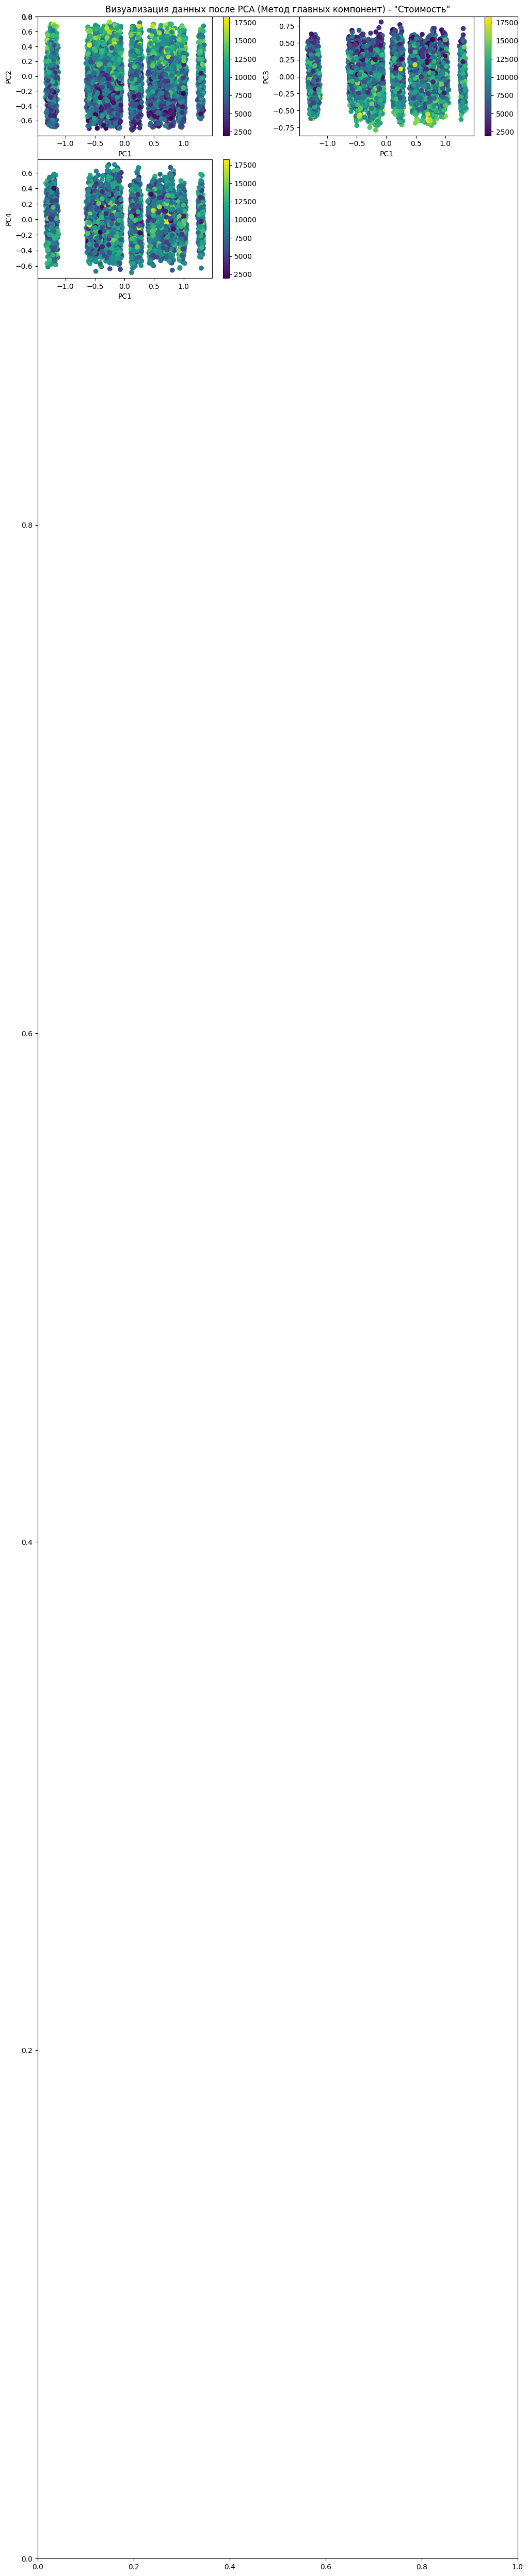

In [33]:
cols = ["PC1", "PC2", "PC3", "PC4"]

plt.figure(figsize=(12, 64))
plt.title('Визуализация данных после PCA (Метод главных компонент) - "Стоимость"')
k = 1
for i in range(9):
    for j in range(i+1, 9):
        col1 = cols[i]
        col2 = cols[j]
        plt.subplot(18, 2, k)
        plt.scatter(X_fa[col1], X_fa[col2], c=y, cmap='viridis')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.colorbar()
        k += 1
plt.tight_layout()
plt.show()

In [35]:
from sklearn.manifold import TSNE

tsne2D = TSNE(n_components=2)
X_tsne = pd.DataFrame(tsne2D.fit_transform(X))

print(X_tsne)

               0          1
0     -18.679920 -14.937324
1     -56.530632 -28.384117
2     -81.193954  -2.862339
3      10.127377 -43.255047
4      78.266548  -9.052889
...          ...        ...
9997   94.811234 -15.581252
9998  -59.594040 -25.299948
9999  -35.840099  -8.497040
10000 -48.155434  -6.419759
10001   0.195708 -54.040607

[10002 rows x 2 columns]


Выводим значения дисперсии и собственные числа, которые соответствуют компонентам

In [42]:
print(tsne2D.embedding_)
print(tsne2D.feature_names_in_)
print(tsne2D.kl_divergence_)
print(tsne2D.learning_rate_)
print(tsne2D.n_features_in_)
print(tsne2D.n_iter_)

[[-18.67992    -14.937324  ]
 [-56.530632   -28.384117  ]
 [-81.193954    -2.8623395 ]
 ...
 [-35.8401      -8.49704   ]
 [-48.155434    -6.4197593 ]
 [  0.19570792 -54.040607  ]]
['Бренд' 'Модель' 'Год' 'Объём двигателя' 'Тип топлива' 'Трансмиссия'
 'Пробег' 'Количество дверей' 'Количество владельцев']
2.323298454284668
208.375
9
999


In [ ]:
X_pca['Стоимость'] = y
X_pca.columns = ['PC1', "PC2", 'PC3', "PC4", 'Стоимость']
print(X_pca.head())

        PC1       PC2       PC3       PC4  Стоимость
0 -0.005537 -0.474243 -0.267443  0.581576       8501
1 -0.519785 -0.213609  0.486516 -0.063140      12092
2 -0.499654 -0.208826 -0.507526 -0.022174      11171
3 -0.018145 -0.431732  0.216738 -0.517342      11780
4  0.525868  0.002722  0.213813  0.320854       2867


Линейные методы понижения размерности данных позволяют уменьшить размерность при сохранении наиболее важной информации. Они фиксируют исходные закономерности и линейные взаимосвязи в данных, предлагая способ их представления в пространстве меньшего размера. 

Один из основных линейных методов — метод главных компонент (PCA). В нём осуществляется поворот системы координат в исходном пространстве признаков таким образом, чтобы в проекции на новые оси (главные компоненты) дисперсия всего множества точек была максимальна.

Принцип работы PCA заключается в поиске сжатого представления исходных данных в меньшем измерении, максимизирующего общую дисперсию (или флуктуацию) исходных данных. Это означает, что общая схема по-прежнему сохраняется, при этом данные максимально упрощаются.


Нелинейные методы понижения размерности пытаются зафиксировать более сложные нелинейные взаимосвязи в данных и представить их в виде пространств меньшей размерности. 

UMAP можно рассматривать как более мощного родственника t-SNE.Он также изучает нелинейные отображения для поддержания целостности кластера, и это происходит быстрее. Кроме того, по сравнению с t-SNE, UMAP, как правило, лучше справляется с поддержанием глобальной структуры данных.